## Credit Card Fraud Detection

#### This dataset contains real credit card transaction data labeled as fraudulent or legitimate. It includes anonymized, PCA-transformed features (V1–V28), transaction time, amount, and a binary fraud label.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset
df = pd.read_csv(r"C:\Users\Nikhil Poojari\Downloads\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


## Data Cleaning, Preprocessing And EDA

In [5]:
# Check missing/null values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [6]:
# Scale 'Amount' column
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

In [7]:
# Create 'Transaction_Hour' = floor(Time / 3600)
df['Transaction_Hour'] = np.floor(df['Time'] / 3600).astype(int)

In [8]:
# Drop original 'Time' and 'Amount' if needed
df.drop(['Time', 'Amount'], axis=1, inplace=True)

In [9]:
# Check class distribution
print(df['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

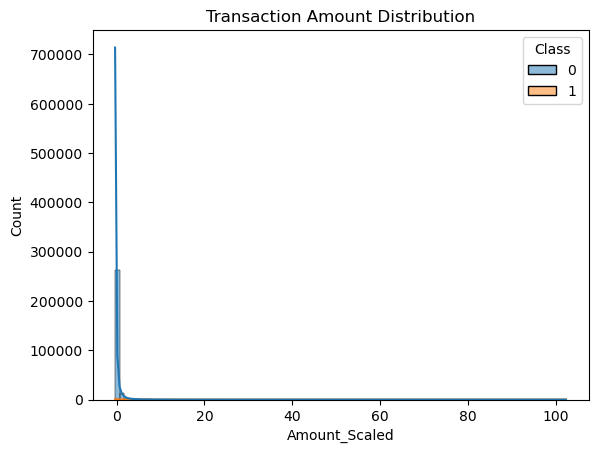

In [10]:
# Distribution of Amount for fraud VS non-fraud.
sns.histplot(data=df, x='Amount_Scaled', hue='Class', bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()

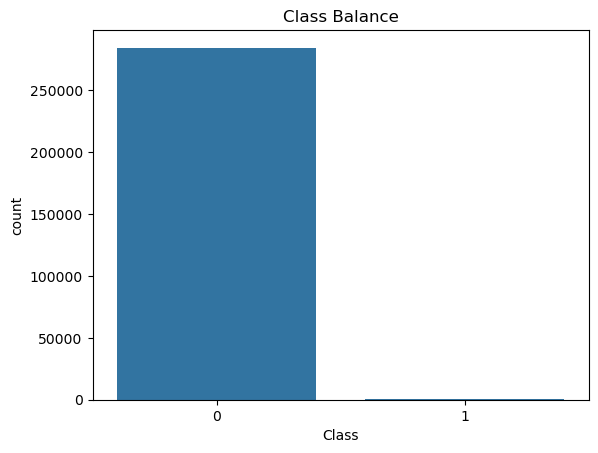

In [11]:
# Count plot of fraud vs. non-fraud transactions
sns.countplot(x='Class', data=df)
plt.title("Class Balance")
plt.show()

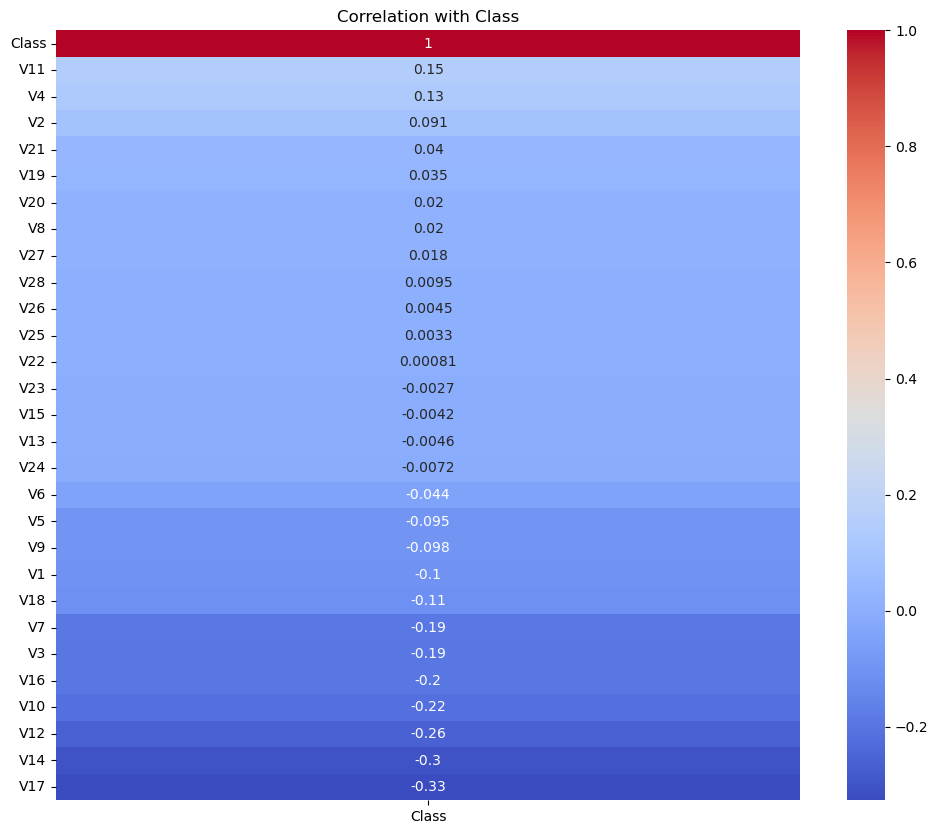

In [12]:
# Correlation heatmap of V1–V28 with Class.
corr = df.drop(['Amount_Scaled', 'Transaction_Hour'], axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Class")
plt.show()

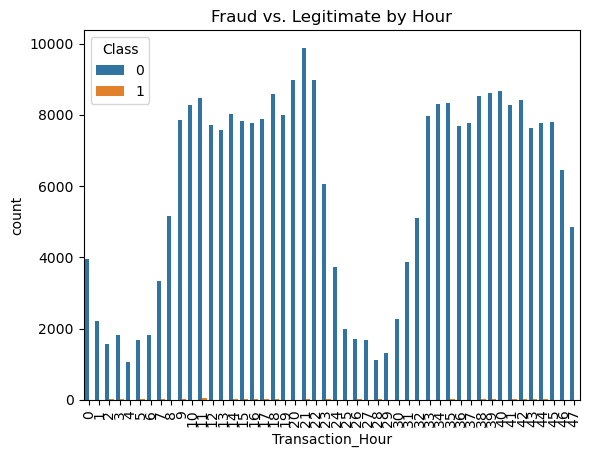

In [13]:
#Time-of-day patterns in fraud.
sns.countplot(data=df, x='Transaction_Hour', hue='Class')
plt.title("Fraud vs. Legitimate by Hour")
plt.xticks(rotation=90)
plt.show()

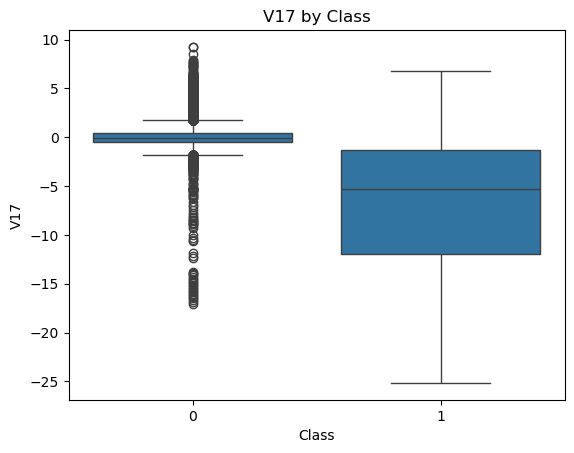

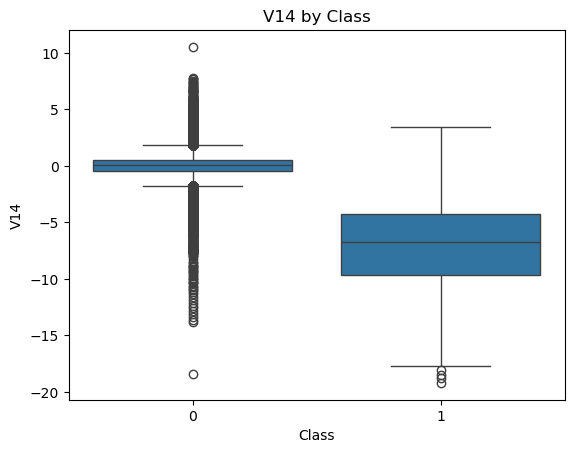

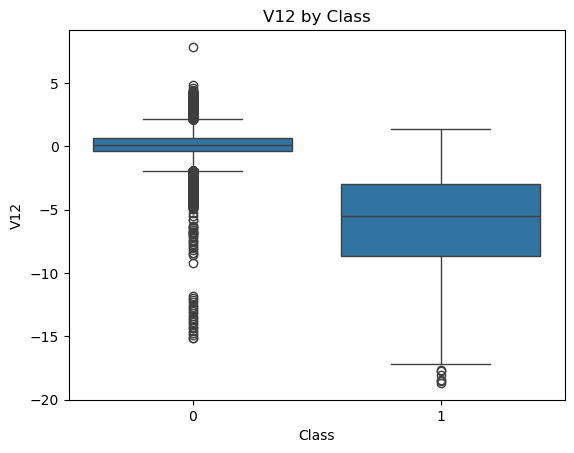

In [14]:
# Boxplots of selected features by fraud label.
top_features = corr['Class'].abs().sort_values(ascending=False)[1:4].index
for feature in top_features:
    sns.boxplot(data=df, x='Class', y=feature)
    plt.title(f'{feature} by Class')
    plt.show()

## Feature Engineering

In [15]:
# Log-transform Amount to reduce skewness.
df['Log_Amount'] = np.log1p(df['Amount_Scaled'])

In [16]:
# Create a binary flag for High Amount transactions
threshold = df['Amount_Scaled'].quantile(0.99)
df['High_Amount_Flag'] = (df['Amount_Scaled'] > threshold).astype(int)

In [17]:
# PCA/Dimensionality Reduction
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

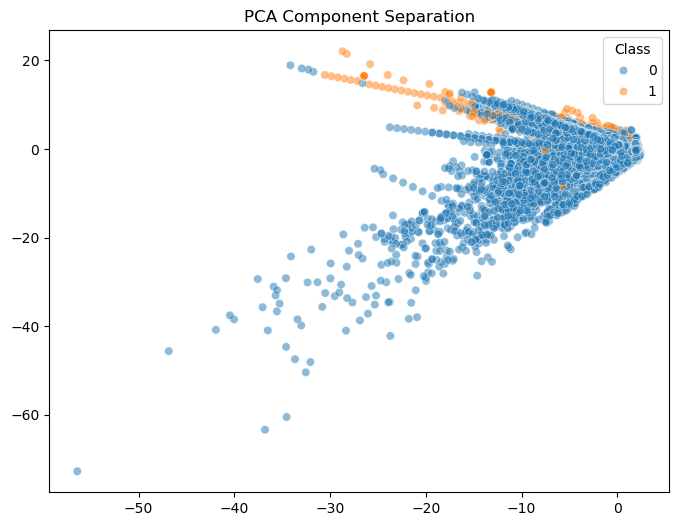

In [18]:
pca = PCA(n_components=2)
components = pca.fit_transform(df[[f'V{i}' for i in range(1, 29)]])
plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['Class'], alpha=0.5)
plt.title('PCA Component Separation')
plt.show()

## Modeling

In [ ]:
!pip install xgboost

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [20]:
# Features and target
X = df.drop(columns=['Class'])
y = df['Class']

In [21]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [22]:
# Use class_weight='balanced' or sampling to address imbalance.
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), use_label_encoder=False, eval_metric='logloss')
}

In [23]:
# Train models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Logistic Regression trained.
Random Forest trained.


C:\Users\Nikhil Poojari\Anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:00:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost trained.


## Evaluation

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

for name, model in models.items():
    print(f"\n{name} Evaluation:")

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    auc_score = roc_auc_score(y_test, y_proba)
    print("ROC-AUC Score:", auc_score)



Logistic Regression Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55454  1410]
 [    8    90]]
ROC-AUC Score: 0.9714051894674584

Random Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56861     3]
 [   23    75]]
ROC-AUC Score: 0.9529043697529659

XGBoost Evaluation:
Classification Report:
              precision    rec

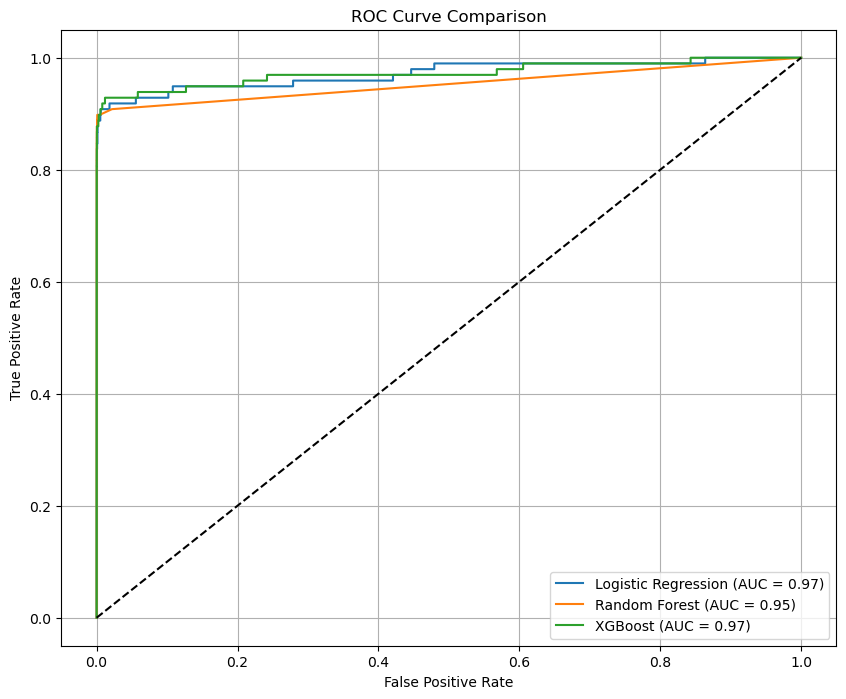

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()